15/20 aleck103

# Algorithmen in der Bioinformatik – Übungsblatt 11
## Abgabe: Freitag, 12.7., 10:30 Uhr

Die Abgabe ist mit bis zu 3 Personen möglich und kann auf Deutsch oder Englisch geschrieben sein. Es muss nur eine Person eines Teams abgeben, in diesem Fall müssen die Namen der Teammitglieder hier in diesem Jupyter Notebook ganz oben genannt werden.

Die praktischen Aufgaben sind mit Python3-Code zu lösen.

Laden Sie das bearbeitete Jupyter Notebook im ILIAS hoch.

**Hinweis:** Sie können eine Bilddatei in ihre Abgabe einbinden, indem Sie test.png durch den entsprechenden Dateinamen ersetzen:

In [1]:
# simple test() function to check function returns vs. what the function was supposed to return.
def test(got, expected):
    if got == expected:
        prefix = ' OK '
    else:
        prefix = '  X '
    print('%s got: %s expected: %s' % (prefix, repr(got), repr(expected)))

## Aufgabe 11.0 (0 Punkte)

Lesen Sie sich Folgendes über Hidden Markov Models (HMMs) durch:

Der letzte Foliensatz zeigt die Rekurrenz für den **Viterbi-Algorithmus**, die man wie folgt schreiben kann:
$$s_{l, 1} = \mathit{emission}_{l}(x_1) \cdot \mathit{transition}_{\mathit{source}, l} \cdot s_{\mathit{source}}$$
$$s_{l, i} = \mathit{emission}_{l}(x_i) \cdot \max_{k \in \mathit{States}} \{\mathit{transition}_{k, l} \cdot s_{k, i-1}\}$$
mit Initialisierung $s_{\mathit{source}} = 1$.

Damit lässt sich die Wahrscheinlichkeit berechnen, dass ein String $x = x_1 x_2 x_3 \ldots x_n$ durch die optimale Zustandsfolge $\pi^*$ entsteht: $$s_{\mathit{sink}} = P(x|\pi^*) = \max_{l \in \mathit{States}}\{s_{l, n}\}$$

Möchte man die Wahrscheinlichkeit berechnen, dass $x$ durch ein HMM erzeugt wird (egal mit welcher Zustandsfolge), muss man $P(x) = \sum_{\pi} P(x|\pi)$ berechnen. Jedoch lässt sich mit dem Viterbi-Algorithmus wegen $\max_{k \in \mathit{States}}$ immer nur die Wahrscheinlichkeit $P(x|\pi^*)$ für die optimale Folge $\pi^*$ herausfinden. Um alle möglichen $P(x|\pi)$ aufzusummieren anstatt nur das Maximum zu nehmen, ersetzen wir $\max_{k \in \mathit{States}}$ durch $\sum_{k \in \mathit{States}}$, wodurch sich folgende Rekurrenz ergibt für den **Forward-Algorithmus**:
$$f_{l, 1} = \mathit{emission}_{l}(x_1) \cdot \mathit{transition}_{\mathit{source}, l} \cdot f_{\mathit{source}}$$
$$f_{l, i} = \mathit{emission}_{l}(x_i) \cdot \sum_{k \in \mathit{States}} \mathit{transition}_{k, l} \cdot f_{k, i-1}$$
mit Initialisierung $f_{\mathit{source}} = 1$.

Damit lässt sich die Wahrscheinlichkeit berechnen, dass der String $x$ durch irgendeine Zustandsfolge $\pi$ entsteht: $$f_{\mathit{sink}} = P(x) = \sum_{l \in \mathit{States}} f_{l, n}$$

Um die Wahrscheinlichkeit herauszufinden, mit der im aktuellen Zustand $l$ nach $i-1$ ausgegebenen Zeichen ein Suffix $x_i x_{i+1} x_{i+2} \ldots x_n$ erzeugt wird, benötigt man die Rekurrenz für den **Backward-Algorithmus**:
$$b_{l, i-1} = \sum_{k \in \mathit{States}} \mathit{emission}_{k}(x_i) \cdot \mathit{transition}_{l, k} \cdot b_{k, i}$$
$$b_{\mathit{source}} = \sum_{k \in \mathit{States}} \mathit{emission}_{k}(x_1) \cdot \mathit{transition}_{l, k} \cdot b_{k, 1} = f_{\mathit{sink}}$$
mit Initialisierung $b_{l, \mathit{sink}} = 1$ $\forall l \in \mathit{States}$. Dadurch kann man auch die optimale Zustandsfolge $\pi^* = \pi_1^* \pi_2^* \pi_3^* \ldots \pi_n^*$ herausfinden, indem man für jedes Zeichen $i$ den Zustand $\pi_i^*$ mit der höchsten Wahrscheinlichkeit abliest.

Möchte man die Wahrscheinlichkeit berechnen, dass $x$ erzeugt wurde und man beim $i$-ten Zeichen $x_i$ in Zustand $k$ war (z. B. um herauszufinden, wie wahrscheinlich eine Münze zu Zeitpunkt $i$ gezinkt war), hilft der Satz von Bayes: $$P(\pi_i = k|x) = \frac{P(x, \pi_i = k)}{P(x)} = \frac{f_{k, i} \cdot b_{k, i}}{P(x)}$$

## Aufgabe 11.1 (15/20 Punkte, 6/6 + 8/9 + 1/5)

Betrachten Sie das folgende HMM $\mathcal{M} = (\Sigma, \mathit{States}, \mathit{Transition}, \mathit{Emission})$ mit<br>
- $\Sigma = \{A, G, T, C\}$,
- $\mathit{States} = \{\alpha, \beta\}$,
- $\mathit{Transition}
= \left(\begin{array}{rr}
\mathit{transition}_{\alpha, \alpha} & \mathit{transition}_{\alpha, \beta} \\ 
\mathit{transition}_{\beta, \alpha} & \mathit{transition}_{\beta, \beta}
\end{array}\right)
= \left(\begin{array}{rr}
0.9 & 0.1 \\ 
0.1 & 0.9
\end{array}\right)$,
- $\mathit{Emission} =
\left(\begin{array}{rrrr}
\mathit{emission}_{\alpha}(A) & \mathit{emission}_{\alpha}(G) & \mathit{emission}_{\alpha}(T) & \mathit{emission}_{\alpha}(C) \\ 
\mathit{emission}_{\beta}(A) & \mathit{emission}_{\beta}(G) & \mathit{emission}_{\beta}(T) & \mathit{emission}_{\beta}(C)
\end{array}\right)
= \left(\begin{array}{rrrr}
0.4 & 0.4 & 0.1 & 0.1 \\ 
0.2 & 0.2 & 0.3 & 0.3
\end{array}\right)$.

Sei $\mathit{transition}_{\mathit{source}, \alpha} = \mathit{transition}_{\mathit{source}, \beta} = 0.5$, d. h., zu Anfang sei es gleich wahrscheinlich, im Zustand $\alpha$ oder $\beta$ zu sein.<br>
Verwenden Sie nicht logarithmierte Wahrscheinlichkeiten und runden Sie die Wahrscheinlichkeiten nicht.

(a) Zeichnen Sie das HMM-Diagramm $\mathcal{M}$ als Graphen, ähnlich zu Foliensatz XXX, Folie XXX.

**Rückmeldung:** Schön!

(b) Betrachten Sie die durch $\mathcal{M}$ erzeugte Folge von Beobachtungen $GGCT$.

(i) Geben Sie den Graphen an, der bei Anwendung des Viterbi-Algorithmus entsteht.

**Rückmeldung:** Richtig, allerdings ist 0,0005832 nicht $5,832^{-4}$ etc.

(ii) Geben Sie den Graphen an, der bei Anwendung des Forward-Algorithmus entsteht.

**Rückmeldung:** Siehe (b)(i).

(iii) Geben Sie den Graphen an, der bei Anwendung des Backward-Algorithmus entsteht.

**Rückmeldung:** Beim Backward-Algorithmus in der Übung habe ich versehentlich einen Schritt zu viel eingezeichnet, als ich den Graphen des Forward-Algorithmus abgeändert habe. Ich füge hier einmal ein, wie es eigentlich aussehen sollte. Ansonsten hast du dich beim Wert oben links und bei der Quelle verrechnet.

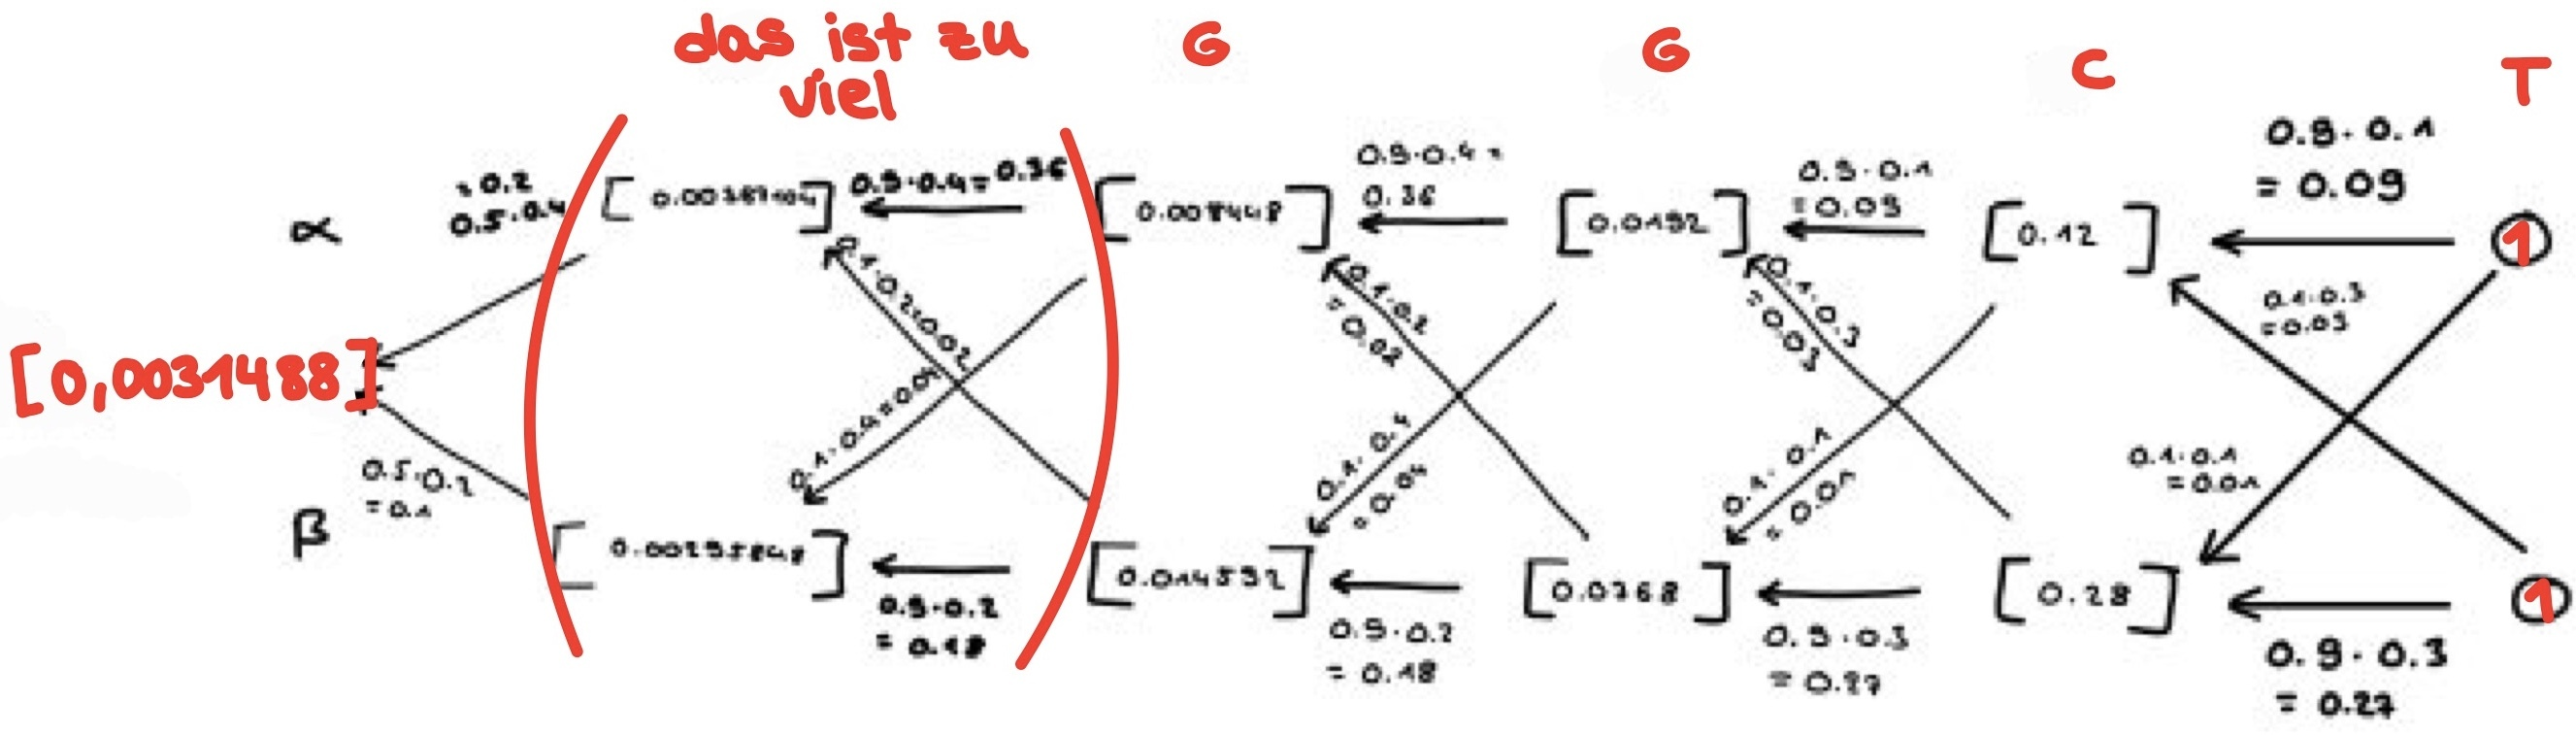

In [2]:
from IPython.display import Image
Image('Markov_Korrektur.jpeg', width=600)

(c) Sei $\pi^*$ die wahrscheinlichste Folge von Zuständen, bei der $GGCT$ durch $\mathcal{M}$ erzeugt worden sein könnte.

(i) Geben Sie $\pi^*$ an.

**Rückmeldung:** Hier müsstest du deutlicher machen, was $\pi^*$ ist (in der Grafik steht 3x "am wahrscheinlichsten" mit jeweils unterschiedlichen Zustandsfolgen).

$\Rightarrow$ Siehe (b)(iii), jeder untere Wert ist größer als der obere, also: $\pi^* = \beta \beta \beta \beta$

(ii) Wie hoch ist $P(GGCT|\pi^*)$, also die Wahrscheinlichkeit, dass $GGCT$ durch $\pi^*$ entstanden ist?

**Rückmeldung:** Richtig, allerdings ist $\pi^*$ nicht $\alpha \alpha \alpha \beta$.

(iii) Wie hoch ist $P(GGCT)$, also die Wahrscheinlichkeit, dass $\mathcal{M}$ bei 4 zu erzeugenden Zeichen $GGCT$ erzeugt?

**Rückmeldung:** Auch hier müsstest du deutlicher machen, was $P(GGCT)$ ist (in der Grafik steht 3x "$P(GGCT) = \dots$" mit jeweils unterschiedlichen Wahrscheinlichkeiten).

$\Rightarrow$ Siehe (b)(ii) oder (b)(iii): $P(GGCT) = 0.0031488$

(iv) Wie hoch ist $P(GGCT, \pi^*_2 = \beta)$, also die Wahrscheinlichkeit, dass $GGCT$ erzeugt wird und $\mathcal{M}$ im Zustand $\beta$ ist nach der Erzeugung von $GG$ (unabhängig davon, ob danach $CT$ erzeugt wird)?

**Rückmeldung:** Siehe (b)(ii) und (b)(iii): $P(GGCT, \pi^*_2 = \beta) = f_{\beta, 2} \cdot b_{\beta, 2} = 0.022 \cdot 0.0768 = 0.0016896$

(v) Wie hoch ist $P(\pi_2 = \beta|GGCT)$, also die Wahrscheinlichkeit, dass $\mathcal{M}$ im Zustand $\beta$ ist nach der Erzeugung von $GG$, wenn am Ende $GGCT$ erzeugt wurde?

**Rückmeldung:** Siehe (c)(iii) und (c)(iv): $P(\pi_2 = \beta|GGCT) = \frac{P(GGCT, \pi_2 = \beta)}{P(GGCT)} = \frac{0.0016896}{0.0031488} = 0.\overline{53658}$

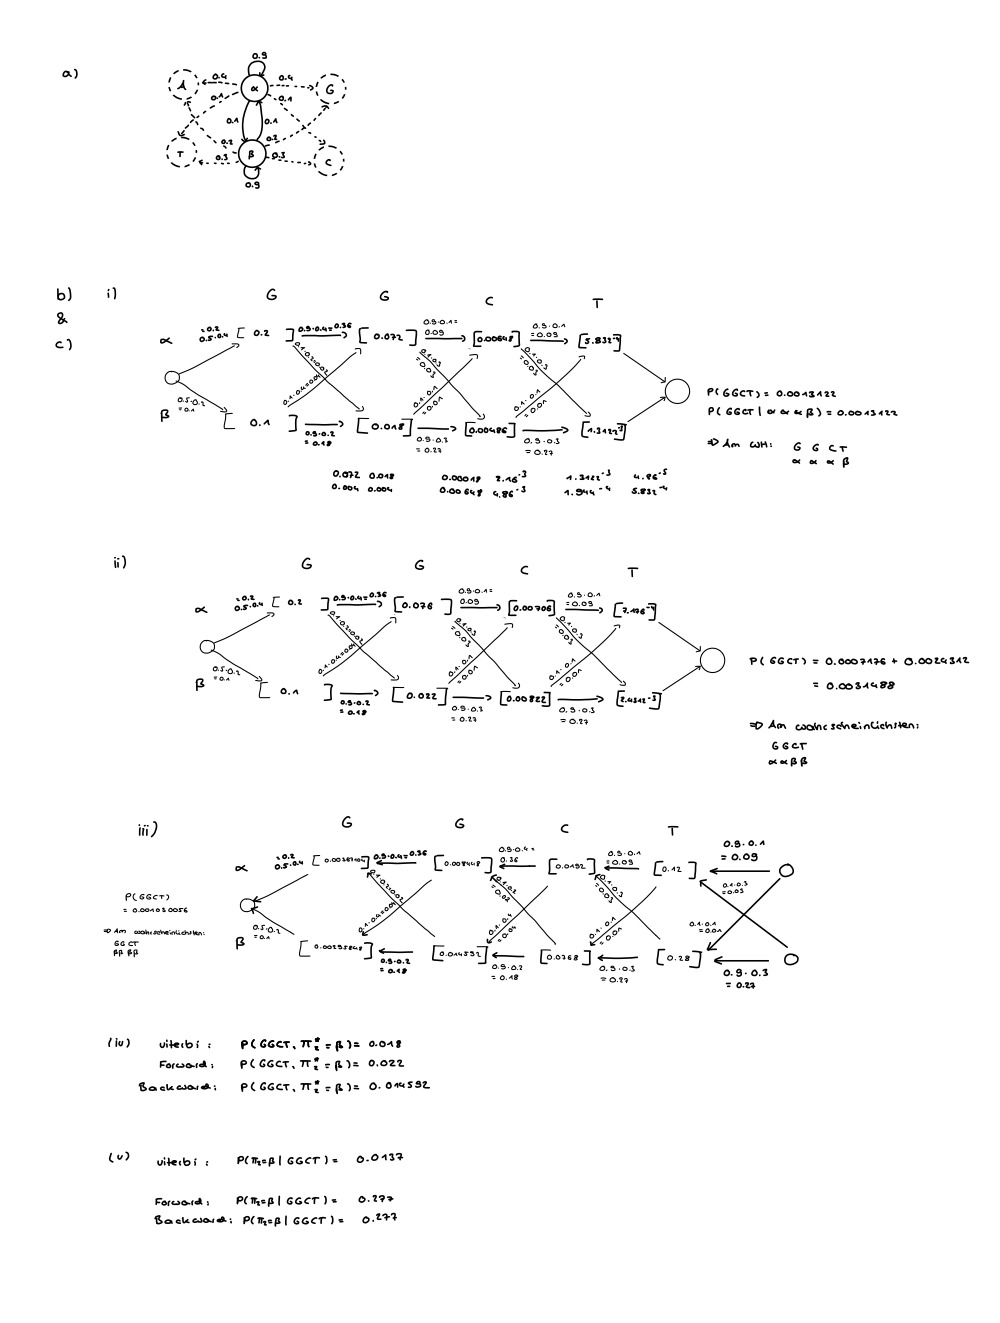

In [3]:
from IPython.display import Image
Image('Markov.jpeg')